In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in and visualising the data

In [129]:
df = pd.read_csv('../house-prices-advanced-regression-techniques/train.csv',index_col='Id')

In [130]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


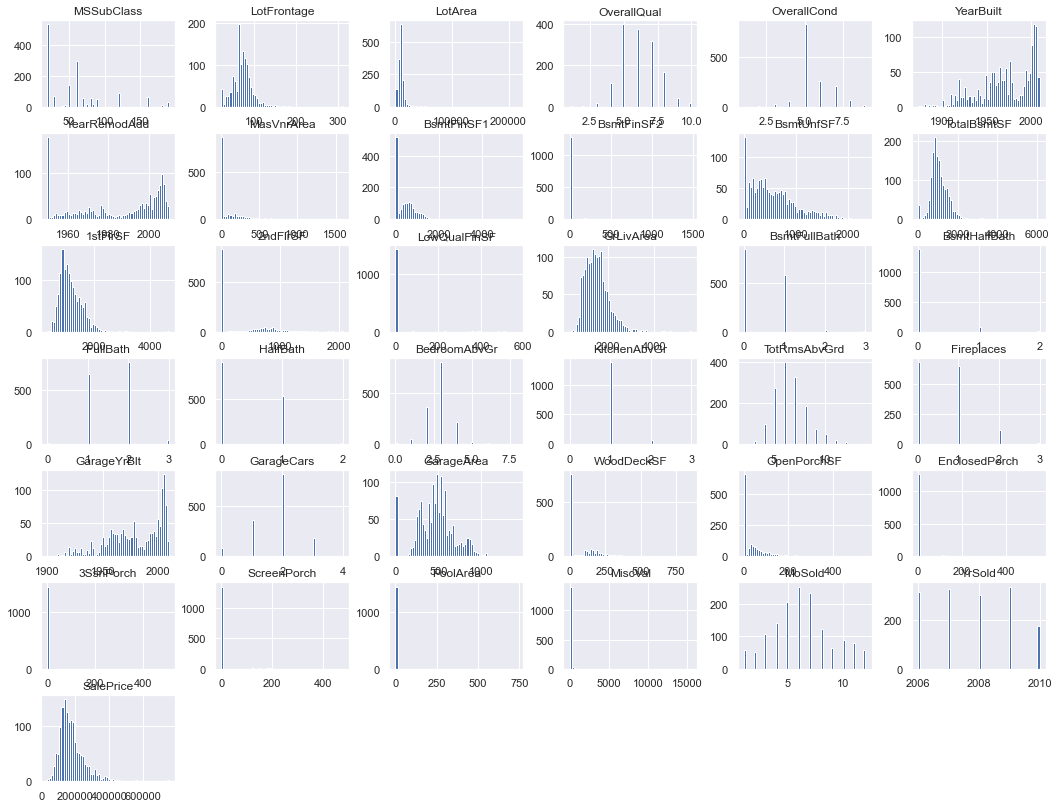

In [131]:
df.hist(bins=60, figsize=(18,14))
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

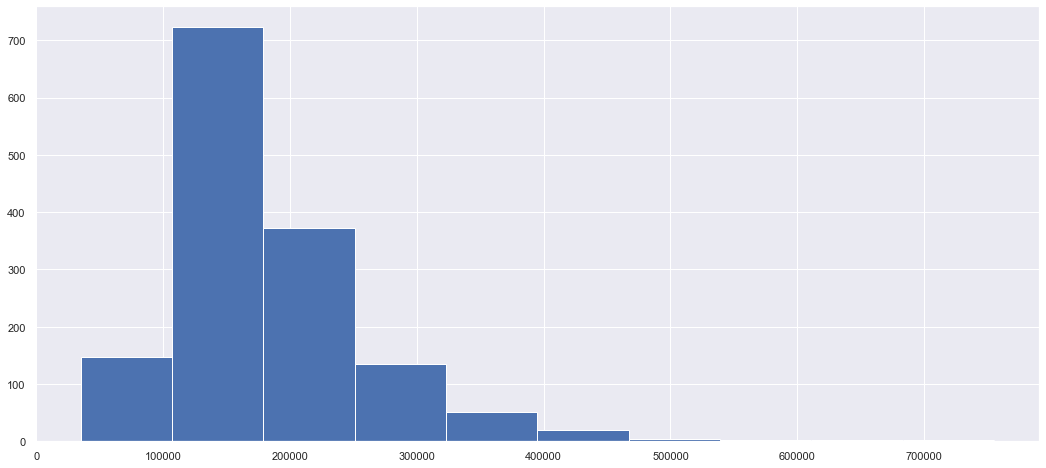

In [132]:
plt.hist(df.SalePrice)

There appears to be a right-skew in the data, which is in line with our expectations as there are always a few luxury homes that will be far more expensive then the median home price, which appears to lie between 100,000 and  200,000 dollars. It might be useful at a later stage to try log-transform the sale price variable.

In [60]:
print("Mean Sale Price:",np.mean(df.SalePrice))

Mean Sale Price: 180921.19589041095


In [61]:
print("Median Sale Price:",np.median(df.SalePrice))

Median Sale Price: 163000.0


# Cleaning the data/ Imputing missing values

We need to deal with missing and non-numeric (categorical) values:

In [62]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [63]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [64]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [65]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [66]:
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [67]:
print(df['FireplaceQu'].head(),df['Fireplaces'].head(),df['PoolArea'].head(),df['PoolQC'].head())

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object 0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64 0    0
1    0
2    0
3    0
4    0
Name: PoolArea, dtype: int64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object


As we can see both PoolQC and FireplaceQu are variables describing the quality of a houses pool and fireplace, respectively. However, for homes without pools or fireplaces, they have simply NaN which shows up as missing data. To fix this, I will combine PoolArea and PoolQC as well as Fireplaces and FireplaceQu into one variable each. I will do this by assigning a quality score for each quality value (2 for Ex (Excellent), 1.5 for Gd (Good) 1 for TA (Average/Typical) and 0.75 for Fa (Fair) for PoolQC and 2 for Ex (Excellent), 1.5 for Gd (Good), 1 for TA (Average), 0.75 for Fa (Fair) and 0.5 for Po (Poor) for FireplaceQu. 


In [133]:
pool_comb = []; fireplace_comb=[]
for i in df['PoolQC']:
    val=0
    if i=='Ex': val = 2
    elif i=='Gd': val = 1.5
    elif i=='TA': val = 1
    elif i=='Fa': val = 0.75
    pool_comb.append(val)

for i in df['FireplaceQu']:
    val=0
    if i=='Ex': val = 2
    elif i=='Gd': val = 1.5
    elif i=='TA': val = 1
    elif i=='Fa': val = 0.75
    elif i=='Po' : val = 0.5
    fireplace_comb.append(val)

df['Pool_comb']=df['PoolArea']*pool_comb
df['Fireplace_comb']=df['Fireplaces']*fireplace_comb

sale_price = df.SalePrice

df = df.drop(['PoolQC','PoolArea','Fireplaces','FireplaceQu','SalePrice'],axis=1)

# Imputing missing numerical values using the median value and scaling the data

In [157]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric = ['int64','float64']
numeric_df = df.select_dtypes(include=numeric)

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])
numeric_df_trans = num_pipeline.fit_transform(numeric_df)

# Converting non-numerical values to dummy variables using one hot encoding

One hot encoding should deal with the remaining missing categorical values such as Alley which only has values if the property is connected to an Alley (the majority aren't). If not, it simply adds zero for these features.

In [160]:
from sklearn.preprocessing import OneHotEncoder

non_num = ['object']
cat_df = df.select_dtypes(include=non_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(numeric_df)
cat_attribs = list(cat_df)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
df_full_prep = full_pipeline.fit_transform(df)
len(num_attribs)

36

# Fitting a linear model

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

LR = LinearRegression()

scores = cross_val_score(LR, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

print("Linear Regression classifier mean RMSE: ", LR_rmse_scores.mean())

Linear Regression classifier mean RMSE:  32626.05173443711


Not a terrible place to start given that the median sale price lies at $163,000. To gain a better understanding of the various variables and their significance in explaining the data, I will fit the same model using statsmodels to gain a better understanding of its output. 

In [72]:
import statsmodels.api as sm

cat_dummies = pd.get_dummies(cat_df)

complete_df = pd.merge(numeric_df, cat_dummies, left_index=True, right_index=True)

complete_df = complete_df.fillna(complete_df.median())

# # Fit and summarize OLS model
mod = sm.OLS(sale_price, complete_df)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     68.43
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:52:56   Log-Likelihood:                -16576.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1214   BIC:                         3.495e+04
Df Model:                         245                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass              -52.6982     82.723     -0.637      0.524    -214.993     109.597
LotFrontage              44.1009     43.590      1.012      0.312     -41.420     129.622
LotArea                   0.7255      0.109      6.659      0.000       0.512       0.939
OverallQual            6680.9883   1013.339      6.593      0.000    4692.897    8669.079
OverallCond            5719.9504    870.437      6.571      0.000    4012.223    7427.678
YearBuilt               317.7165     76.957      4.129      0.000     166.734     468.699
YearRemodAdd            102.2312     55.559      1.840      0.066      -6.771     211.234
MasVnrArea               19.4542      5.777      3.367      0.001       8.120      30.789
BsmtFinSF1               16.5438      2.879      5.747      0.000      10.896      22.191
BsmtFinSF2                7.6624      5.968      1.284      0.199      -4.046      19.371
BsmtUnfSF                -2.1729      2.759     -0.788      0.431      -7.585       3.239
TotalBsmtSF              22.0334      4.047      5.444      0.000      14.093      29.974
1stFlrSF                 18.5699      6.284      2.955      0.003       6.240      30.900
2ndFlrSF                 37.1667      5.440      6.832      0.000      26.493      47.840
LowQualFinSF            -28.8821     13.726     -2.104      0.036     -55.811      -1.953
GrLivArea                26.8545      5.596      4.799      0.000      15.876      37.833
BsmtFullBath           1270.0490   1973.085      0.644      0.520   -2600.986    5141.084
BsmtHalfBath           -709.1034   3017.703     -0.235      0.814   -6629.596    5211.389
FullBath               3952.9941   2196.591      1.800      0.072    -356.542    8262.531
HalfBath               1909.0474   2092.769      0.912      0.362   -2196.797    6014.892
BedroomAbvGr          -3654.5426   1361.608     -2.684      0.007   -6325.908    -983.178
KitchenAbvGr          -1.328e+04   5694.780     -2.332      0.020   -2.45e+04   -2105.433
TotRmsAbvGrd           1645.1474    948.556      1.734      0.083    -215.844    3506.139
GarageYrBlt             -20.2682     61.296     -0.331      0.741    -140.527      99.990
GarageCars             4275.8726   2272.813      1.881      0.060    -183.205    8734.950
GarageArea               17.4619      7.876      2.217      0.027       2.010      32.914
WoodDeckSF               14.3680      5.848      2.457      0.014       2.895      25.841
OpenPorchSF               3.5401     11.464      0.309      0.758     -18.951      26.031
EnclosedPorch             2.5745     12.413      0.207      0.836     -21.779      26.928
3SsnPorch                30.5037     22.311      1.367      0.172     -13.269      74.276
ScreenPorch              35.0534     12.491      2.806      0.005      10.548      59.559
MiscVal                

### Feature selection

As could perhaps be expected, we have a very high adjusted R^2 value of 0.92, with a lot of highly significant explanatory variables in the model. However, there also are quite a few very insignificant variables in the model that likely reduce model accuracy and lead to overfitting. Given the huge amount of them, I will automate this using forward and backward model selection, as unfortunately the number of features are too high to use a best-subset approach. 

In [73]:
from tqdm.notebook import tnrange
import itertools
from sklearn.metrics import mean_squared_error


def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared
    
#Initialization variables
Y = sale_price
X = complete_df
k = len(complete_df.columns)

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] 
features_list = dict()

#Looping over all the features in X
for i in tnrange(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

  0%|          | 0/280 [00:00<?, ?it/s]

In [74]:
feature_df = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
feature_df['numb_features'] = feature_df.index

#Initializing useful variables
m = len(Y)
p = len(complete_df.columns)
hat_sigma_squared = (1/(m - p -1)) * min(feature_df['RSS'])

feature_df['AIC'] = (1/(m*hat_sigma_squared)) * (feature_df['RSS'] + 2 * feature_df['numb_features'] * hat_sigma_squared )
feature_df['BIC'] = (1/(m*hat_sigma_squared)) * (feature_df['RSS'] +  np.log(m) * feature_df['numb_features'] * hat_sigma_squared )
feature_df.head()

,features,RSS,R_squared,numb_features,AIC,BIC
1,[OverallQual],3.446964e+12,0.625652,1,4.478752,4.482373
2,"[OverallQual, GrLivArea]",2.631868e+12,0.714173,2,3.421364,3.428606
3,"[OverallQual, GrLivArea, BsmtQual_Ex]",2.291953e+12,0.751089,3,2.981207,2.992069
4,"[OverallQual, GrLivArea, BsmtQual_Ex, BsmtFinSF1]",2.096570e+12,0.772308,4,2.728787,2.743270
5,"[OverallQual, GrLivArea, BsmtQual_Ex, BsmtFinS...",1.779625e+12,0.806729,5,2.318466,2.336569


### Plotting AIC and BIC against the number of features

Max. AIC 0.992862722617062 using  89  features.
Max. BIC 1.1904819683376002 using  35  features.


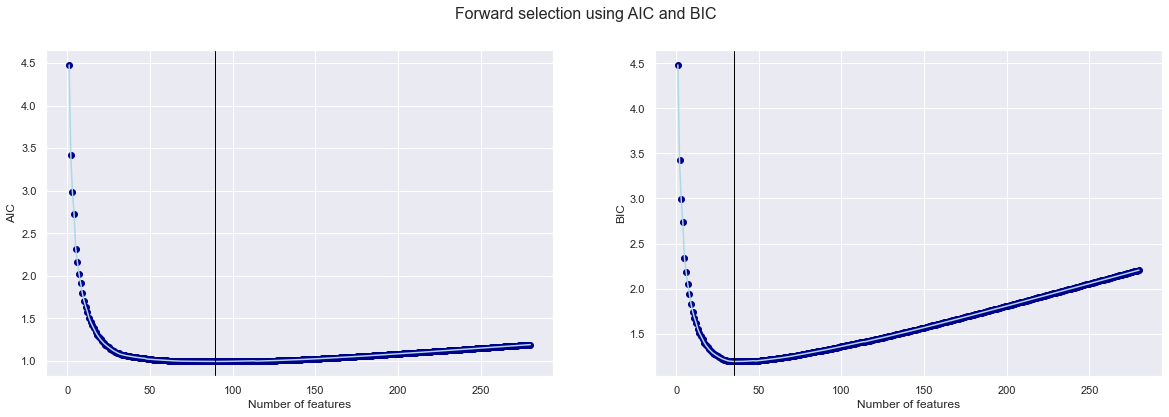

In [75]:
fig = plt.figure(figsize = (20,6))

for i,k in enumerate(['AIC','BIC']):
    ax = fig.add_subplot(1, 2, i+1)
    
    ax.plot(feature_df['numb_features'],feature_df[k], color = 'lightblue')
    ax.scatter(feature_df['numb_features'],feature_df[k], color = 'darkblue')
    ax.plot(feature_df[k].idxmin(),feature_df[k].min(), marker = '|', markersize = 1000, color = 'black')
    
    ax.set_xlabel('Number of features'); ax.set_ylabel(k)

fig.suptitle('Forward selection using AIC and BIC', fontsize = 16)

print("Max. AIC",feature_df['AIC'].min(),"using ",feature_df['AIC'].idxmin()," features.")
print("Max. BIC",feature_df['BIC'].min(),"using ",feature_df['BIC'].idxmin()," features.")

### Fitting a model using the features identified using AIC criteria

In [76]:
#Setting up the X and Y variables, adding constant term for intercept
Y = sale_price
X = complete_df.filter(feature_df.iloc[feature_df['AIC'].idxmin(),0])
X = sm.add_constant(X)
X.head()

mod2 = sm.OLS(Y, X)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:59:10   Log-Likelihood:                -16631.
No. Observations:                1460   AIC:                         3.344e+04
Df Residuals:                    1369   BIC:                         3.392e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.734e+05   1.12e+05     -7.825      0.000   -1.09e+06   -6.54e+05
OverallQual           6469.8336    866.939      7.463      0.000    4769.161    8170.507
GrLivArea               55.5971      3.098     17.946      0.000      49.520      61.675
BsmtQual_Ex           1.968e+04   3034.991      6.485      0.000    1.37e+04    2.56e+04
BsmtFinSF1              17.4266      1.968      8.856      0.000      13.566      21.287
RoofMatl_ClyTile     -6.763e+05   2.84e+04    -23.832      0.000   -7.32e+05   -6.21e+05
YearBuilt              319.8159     45.603      7.013      0.000     230.357     409.275
MSSubClass            -119.3375     37.795     -3.158      0.002    -193.479     -45.196
Condition2_PosN      -2.239e+05   1.69e+04    -13.218      0.000   -2.57e+05   -1.91e+05
KitchenQual_Ex        2.353e+04   3179.079      7.400      0.000    1.73e+04    2.98e+04
BsmtExposure_Gd       1.695e+04   2621.470      6.464      0.000    1.18e+04    2.21e+04
OverallCond           5139.2527    722.145      7.117      0.000    3722.622    6555.883
SaleType_New          2.178e+04   3281.352      6.639      0.000    1.53e+04    2.82e+04
Neighborhood_NoRidge   3.54e+04   4253.415      8.323      0.000    2.71e+04    4.37e+04
LotArea                  0.5881      0.088      6.686      0.000       0.416       0.761
BedroomAbvGr         -4111.0561   1167.035     -3.523      0.000   -6400.428   -1821.685
Neighborhood_NridgHt  2.481e+04   3525.229      7.037      0.000    1.79e+04    3.17e+04
Neighborhood_StoneBr  4.352e+04   5010.427      8.685      0.000    3.37e+04    5.33e+04
Neighborhood_Crawfor  2.028e+04   3704.816      5.473      0.000     1.3e+04    2.75e+04
GarageArea              16.6117      6.717      2.473      0.014       3.434      29.789
RoofMatl_WdShngl      5.392e+04   1.06e+04      5.103      0.000    3.32e+04    7.47e+04
ExterQual_Ex          2.318e+04   4382.595      5.290      0.000    1.46e+04    3.18e+04
Pool_comb               92.2543     11.486      8.032      0.000      69.722     114.787
Functional_Typ        1.443e+04   2577.887      5.597      0.000    9371.793    1.95e+04
SaleCondition_Normal  6023.6958   2122.292      2.838      0.005    1860.399    1.02e+04
TotalBsmtSF             11.5565      2.361      4.894      0.000       6.925      16.188
Neighborhood_Somerst   1.29e+04   2960.789      4.355      0.000    7087.226    1.87e+04
BsmtExposure_No      -4483.9067   1482.267     -3.025      0.003   -7391.668   -1576.145
BldgType_Duplex       4233.9471   6175.614      0.686      0.493   -7880.744    1.63e+04
Exterior1st_BrkFace   1.747e+04   3483.492      5.016      0.000    1.06e+04    2.43e+04
Condition1_Norm       6892.7843   2123.804      3.245      0.001    2726.522    1.11e+04
Neighborhood_BrkSide  6669.8366   3364.464      1.982    

This model based on the features identified by forward model selection minimising AIC looks a lot better than our initial model containing 280 variables. This model still contains 89 variables, some of which are not significant at the 5% level. Let's look at how the model using features identified with the BIC criteria performs:

### Fitting a model using the features identified using BIC criteria 

In [77]:
#Setting up the X and Y variables, adding constant term for intercept
Y = sale_price
X = complete_df.filter(feature_df.iloc[feature_df['BIC'].idxmin(),0])
X = sm.add_constant(X)
X.head()

mod3 = sm.OLS(Y, X)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     428.2
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:59:10   Log-Likelihood:                -16740.
No. Observations:                1460   AIC:                         3.355e+04
Df Residuals:                    1423   BIC:                         3.375e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.783e+05   6.55e+04    -13.419      0.000   -1.01e+06    -7.5e+05
OverallQual           7929.6287    828.172      9.575      0.000    6305.059    9554.198
GrLivArea               64.9754      2.248     28.904      0.000      60.566      69.385
BsmtQual_Ex           2.144e+04   3105.208      6.906      0.000    1.54e+04    2.75e+04
BsmtFinSF1              17.7261      1.758     10.081      0.000      14.277      21.175
RoofMatl_ClyTile     -6.723e+05   2.72e+04    -24.702      0.000   -7.26e+05   -6.19e+05
YearBuilt              417.6020     33.693     12.394      0.000     351.509     483.695
MSSubClass            -154.7959     16.654     -9.295      0.000    -187.464    -122.128
Condition2_PosN      -2.295e+05   1.73e+04    -13.262      0.000   -2.63e+05   -1.96e+05
KitchenQual_Ex        2.545e+04   3253.623      7.821      0.000    1.91e+04    3.18e+04
BsmtExposure_Gd         1.8e+04   2577.353      6.985      0.000    1.29e+04    2.31e+04
OverallCond           5705.4623    640.493      8.908      0.000    4449.050    6961.875
SaleType_New          2.477e+04   3352.173      7.390      0.000    1.82e+04    3.13e+04
Neighborhood_NoRidge  4.272e+04   4148.217     10.298      0.000    3.46e+04    5.09e+04
LotArea                  0.4301      0.069      6.192      0.000       0.294       0.566
BedroomAbvGr         -3265.9140   1023.108     -3.192      0.001   -5272.875   -1258.953
Neighborhood_NridgHt  2.722e+04   3527.932      7.716      0.000    2.03e+04    3.41e+04
Neighborhood_StoneBr  4.431e+04   5105.794      8.678      0.000    3.43e+04    5.43e+04
Neighborhood_Crawfor  2.594e+04   3560.798      7.286      0.000     1.9e+04    3.29e+04
GarageArea              22.8525      3.935      5.808      0.000      15.134      30.571
RoofMatl_WdShngl      6.833e+04   9979.273      6.847      0.000    4.88e+04    8.79e+04
ExterQual_Ex          2.772e+04   4438.471      6.245      0.000     1.9e+04    3.64e+04
Pool_comb               72.5148     11.234      6.455      0.000      50.478      94.551
Functional_Typ        1.515e+04   2599.996      5.826      0.000       1e+04    2.02e+04
SaleCondition_Normal  9166.4006   2165.636      4.233      0.000    4918.219    1.34e+04
TotalBsmtSF             10.8802      2.195      4.957      0.000       6.574      15.186
Neighborhood_Somerst  1.388e+04   2980.984      4.657      0.000    8035.944    1.97e+04
BsmtExposure_No      -6761.9589   1502.856     -4.499      0.000   -9710.011   -3813.907
BldgType_Duplex      -1.306e+04   3643.689     -3.585      0.000   -2.02e+04   -5915.023
Exterior1st_BrkFace   1.495e+04   3465.651      4.314      0.000    8152.815    2.17e+04
Condition1_Norm       8332.9346   1884.148      4.423      0.000    4636.928     1.2e+04
Neighborhood_BrkSide  1.264e+04   3314.351      3.812    

This model using features based on minimising BIC looks better than the AIC one. It is a lot sparser, containing only 36 features, all of which are highly significant. As can be expected, adjusted R^2 is slightly lower at 0.913, but only very slightly given the huge drop in features from the original model. This model looks quite promising, let's see how it's RMSE compares to the initial linear model we fitted at the beginning containing every feature:

In [78]:
lm = LinearRegression()

scores = cross_val_score(lm, complete_df.filter(feature_df.iloc[feature_df['AIC'].idxmin(),0]), sale_price,
scoring="neg_mean_squared_error", cv=10)
lmAIC_rmse_scores = np.sqrt(-scores)

print("Linear Regression classifier [AIC] mean RMSE: ", lmAIC_rmse_scores.mean())

Linear Regression classifier [AIC] mean RMSE:  29044.596110812225


In [79]:
lm = LinearRegression()

scores = cross_val_score(lm, complete_df.filter(feature_df.iloc[feature_df['BIC'].idxmin(),0]), sale_price,
scoring="neg_mean_squared_error", cv=10)
lmBIC_rmse_scores = np.sqrt(-scores)

print("Linear Regression classifier [BIC] mean RMSE: ", lmBIC_rmse_scores.mean())

Linear Regression classifier [BIC] mean RMSE:  29578.551594274508


A significant improvement compared to the baseline RMSE of 32000 in the baseline model.

# Using Regularisation 

Another approach to automating feature selection is using so called regularisation techniques, such as Ridge or Lasso regression. These penalise a model according to the number of parameters in them, similar to using AIC or BIC. Let's see how this compares:

# Fitting a ridge-regression model

In [81]:
from sklearn.linear_model import Ridge
ridge = Ridge()
scores = cross_val_score(ridge, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
ridge_scores = np.sqrt(-scores)

print("Ridge regression classifier mean RMSE: ", ridge_scores.mean())

Ridge regression classifier mean RMSE:  30622.21926248801


Ridge regression performs better than standard linear regression, still not quite as good as the models using variable selection with AIC and BIC criteria. However, there might be some room for improvement by fine-tuning some of their hyperparameters. We will try this in the next step.

# Fitting a Decision Tree model

Let's try a decision tree instead. These often work surprisingly well, however can be prone to overfitting so I will use cross-validation to ensure the model does not overfit to the training data.

In [82]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

scores = cross_val_score(tree, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Decision Tree classifier mean RMSE: ", tree_rmse_scores.mean())

Decision Tree classifier mean RMSE:  40527.01305320787


The decision tree comes close to the performance of the linear regression model but does not quite match it. This is encouraging though, an ensemble learning approach such as random forests or xgboost might work well on this data. 

# Fitting a random forest classifier

In [102]:
from sklearn.ensemble import RandomForestRegressor
ran_forest = RandomForestRegressor()

scores = cross_val_score(ran_forest, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
forest_scores = np.sqrt(-scores)

print("Random Forest classifier mean :", forest_scores.mean())

Random Forest classifier mean : 28436.598851018138


As expected, a random forest performes better than the simple decision tree model, and in fact also better than the linear model. Let's see how another ensemble learning method, boosting, performes on this dataset.

# Fitting a model using the Xgboost package

Xgboost is another form of boosting that has been fine-tuned to maximise accuracy and performance . Let's see how this compares:

In [101]:
import xgboost as xgb

reg = xgb.XGBRegressor()
scores = cross_val_score(reg, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
xgb_scores = np.sqrt(-scores)

print("Xgboost classifier mean RMSE: ", xgb_scores.mean())


Xgboost classifier mean RMSE:  29185.88433476547


# Fine tuning the most promising models using GridSearch

So far, we have tried various regularised regression models (Lasso and Ridge regression), tree based regression models (Random forest, Gradient boosting and Xgboost) as well as a multilayer-perceptron model. Let's do a quick side-by-side comparison on their performance: 

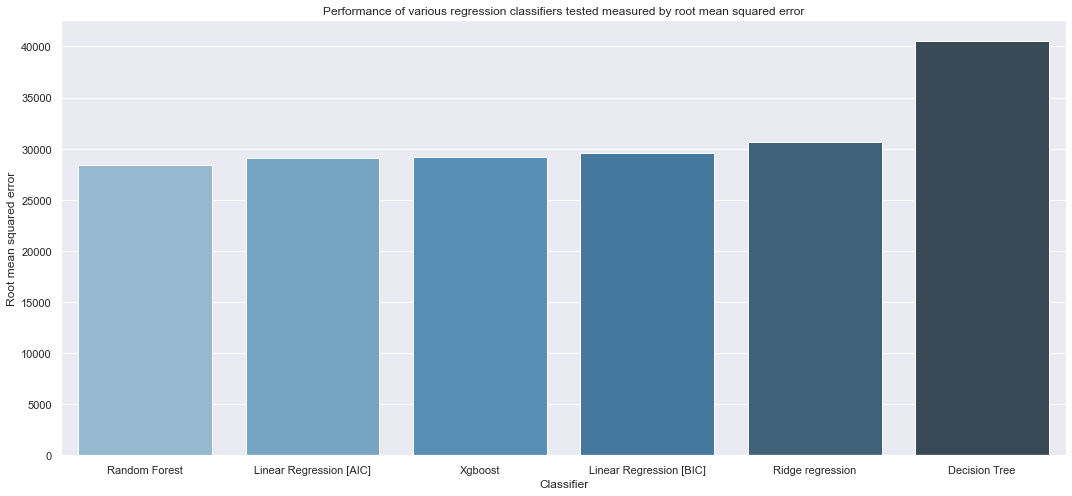

In [103]:
labels = {"Classifier" : ["Linear Regression [AIC]","Linear Regression [BIC]","Ridge regression",
                          "Decision Tree","Random Forest","Xgboost"],
          "Root mean squared error" : [lmAIC_rmse_scores.mean(), lmBIC_rmse_scores.mean(),
                                       ridge_scores.mean(),tree_rmse_scores.mean(),forest_scores.mean(),
                                       xgb_scores.mean()]}

labels = pd.DataFrame.from_dict(labels).sort_values(by='Root mean squared error')

sns.set(rc = {'figure.figsize':(18,8)})
ax = sns.barplot(x="Classifier", y="Root mean squared error", data=labels,palette="Blues_d").set_title('Performance of various regression classifiers tested measured by root mean squared error')

As we can see, most of the classifiers we have tried to fit to the data have performed relatively similar, with the exception of the decision tree which performs quite a bit worse. One thing to keep in mind however, is that we have already somewhat fine-tuned our AIC and BIC scored linear regression models, while just using the standard versions on the other classifiers. Let's see what can be done to improve those:

In [121]:
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,10,15,20,30,40]}

forest_reg = RandomForestRegressor()

grid_search_ran_forest = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_ran_forest.fit(df_full_prep, sale_price)
grid_search_ran_forest.best_estimator_

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=100; total time=   0.6s
[CV] END ...max_depth=3, max_features=auto, n_estimators=200; total time=   1.2s
[CV] END ...max_depth=3, max_features=auto, n_

[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=3, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=3, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=3, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END ...max_depth=3, max

[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=10, max

[CV] END ..max_depth=15, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=100; total time=   6.5s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.0s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.1s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.0s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  12.9s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.0s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.1s
[CV] END ..max_depth=15, max_features=auto, n_estimators=200; total time=  13.1s
[CV] END ..max_depth=15, max

[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=15, max_features=log2, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max_features=log2, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=15, max

[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=20, max

[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.8s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.8s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.8s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.8s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=200; total time=  13.9s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  20.8s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  20.7s
[CV] END ..max_depth=30, max_features=auto, n_estimators=300; total time=  20.9s
[CV] END ..max_depth=30, max

[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=30, max_features=log2, n_estimators=300; total time=   1.6s
[CV] END ..max_depth=30, max_features=log2, n_estimators=300; total time=   1.6s
[CV] END ..max_depth=30, max_features=log2, n_estimators=300; total time=   1.6s
[CV] END ..max_depth=30, max_features=log2, n_estimators=300; total time=   1.6s
[CV] END ..max_depth=30, max_features=log2, n_estimators=300; total time=   1.6s
[CV] END ..max_depth=30, max

[CV] END ..max_depth=40, max_features=sqrt, n_estimators=200; total time=   1.9s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=200; total time=   1.7s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=200; total time=   1.6s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max_features=sqrt, n_estimators=300; total time=   2.4s
[CV] END ..max_depth=40, max

RandomForestRegressor(max_depth=30, n_estimators=500)

In [117]:
import xgboost as xgb

param_grid = { 
    'eta': [0.05,0.095,0.1,0.2],
    'n_estimators': [500,600,700,800],
    'max_depth' : [2,3,5]}

boost = xgb.XGBRegressor()
grid_search_xgb = GridSearchCV(boost,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_xgb.fit(df_full_prep, sale_price)
grid_search_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0949999988, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
param_grid ={
    'alpha' : [0.001,0.01,0.1,1,10,19.5,19.9,20,20.01,20.02,20.03,20.5,21,50,100]
} 

ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True)
grid_search_ridge.fit(df_full_prep, sale_price)
grid_search_ridge.best_estimator_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .....................................

[CV] END ........................................alpha=20.03; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END .........................................alpha=20.5; total time=   0.0s
[CV] END ...........................................alpha=21; total time=   0.0s
[CV] END ...................

Ridge(alpha=20.01)

# Final model selection

In [123]:
final_scores_ridge = cross_val_score(grid_search_ridge.best_estimator_, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
final_ridge_scores = np.sqrt(-final_scores_ridge)

print("Ridge regression mean RMSE: ", final_ridge_scores.mean())

Ridge regression mean RMSE:  29828.502482459015


In [124]:
final_scores_forest = cross_val_score(grid_search_ran_forest.best_estimator_, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
final_forest_scores = np.sqrt(-final_scores_forest)

print("Final Random Forest mean RMSE: ", final_forest_scores.mean())

Final Random Forest mean RMSE:  28985.939723621752


In [137]:
final_scores_xgb = cross_val_score(grid_search_xgb.best_estimator_, df_full_prep, sale_price,
scoring="neg_mean_squared_error", cv=10)
final_xgb_scores = np.sqrt(-final_scores_xgb)

print("Final Xgboost mean RMSE: ", final_xgb_scores.mean())

Final Xgboost mean RMSE:  26529.28455793183


# Conclusion

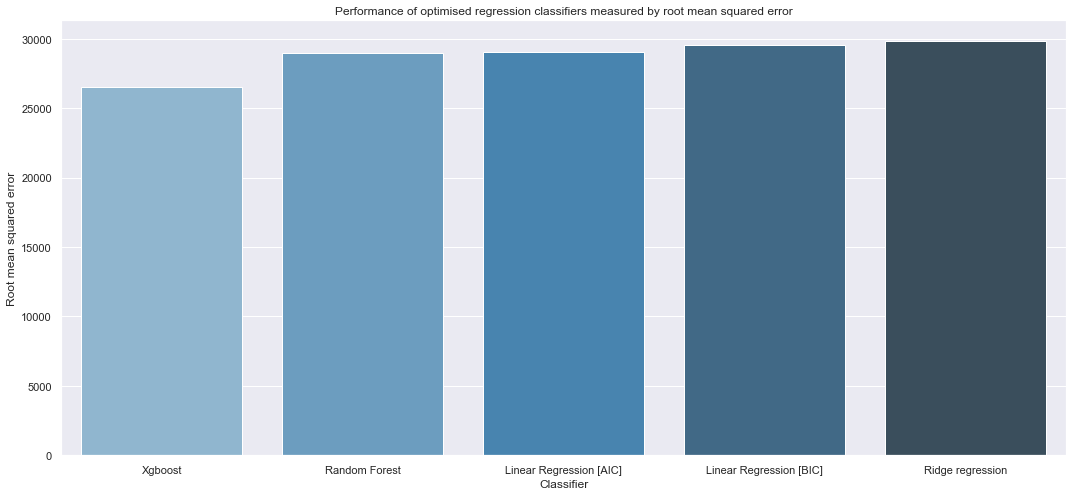

In [139]:
labels = {"Classifier" : ["Linear Regression [AIC]","Linear Regression [BIC]","Ridge regression","Random Forest","Xgboost"],
          "Root mean squared error" : [lmAIC_rmse_scores.mean(), lmBIC_rmse_scores.mean(),final_ridge_scores.mean(),final_forest_scores.mean(), final_xgb_scores.mean()]}

labels = pd.DataFrame.from_dict(labels).sort_values(by='Root mean squared error')

sns.set(rc = {'figure.figsize':(18,8)})
ax = sns.barplot(x="Classifier", y="Root mean squared error", data=labels,palette="Blues_d").set_title('Performance of optimised regression classifiers measured by root mean squared error')

We can see that the Xgboost model had a significant reduction in its Root-mean squared error from tuning the model's parameters, in particular the learning rate. This model now performs significantly better than our other ones and I will choose this one for my final predictions.

Overall we made great progress in selecting and tuning an optimal model to use for prediction of house prices based on the houses characteristics. We successfully reduced the root mean squared error of our initial linear model of $33,000 to one of only $26,000 using a fine-tuned Xgboost model.